## 191025
### Meeting summary with John-Marc
#### *** Query pdb_chain_diff to see whether pdb_chain_id of is_same = 0 are captued 

#### The website design display inteactively the human variant and domain
- Check JS MOL latest version
- LiteMol: Nature Method - LiteMol suite: interactive webbased visualization of large-scale macromolecular structure data
- PDB Chains in the 
- Type in a variant, a landing page for that thing 
    - Variant header
    - Description from database
    - Visualization in the context of the structue, missense, non-sense, missense not as severe as missense variant 
    - A static image and can enlarge mouse over can swtich 
    - PDB chain viewer secondary - run DSSP
    - the code thumbnail.java ——> pymol on the scipt 
    - The interactive images
    - The grant relevant related 


#### The human vaiant database to import
- Make a slide on the where getting the data, how much data, variant formats
- Mock up of the new pages 
- "Rolens data" ? Which is cite in the grant 

#### The general goal and specific aims 
- Structural variant data in related species - great ape 
- Non human variant data in the same family/superfamily to infer a human variant 
- For Example: Yeast protein in scop; human protein not in but scop 
- All the variant in the same superfamily: Superfamily bridging together protein families with common functional and structural features inferred to be from a common evolutionary ancestor.
- Another intestering side note: Superfamily visualization of the domain arrangements in each family 




## 191027
- svn checkout svn+ssh://jmc@ipa/lab/svn/scop/trunk/scop-newui-php-bootstrap to copy the file but got stuck as it ask me to enter jmc@ipa's password
- Check the Grant and selected the HGVS, dbSNP, ClinVar
- A total of 774,863 variant records, integrated in the HuVarBase
- TO-DO:
    1. check pdb_chain_diff
    2. perform a mock trial on:    
        1) DONE: Importing the lastest Uniprot and Inspection of Uniprot - Seqres mapping   
        2) Importing Human Variants
            1. Significance
            2. Potential source of import
            3. Toy Example of import (Maybe GAA in ClinVar)
        3) Leading to the amendments on webpage
            1. LiteMOL
            2. Thumbnail for pdb entries found
            3. secondary structure display in uniprot/DSSP way

## 191029
1. Check if the pdb_chain_id for seqres-uniprot mismatch are present in pdb_chain_diff

`
create table link_diff_compare_uniprot_seqres as select d.*,c.is_same from compare_uniprot_seqres as c, pdb_chain_diff as d where c.pdb_chain_dbref_id = d.pdb_chain_dbref_id
`

`
select count(distinct(pdb_chain_dbref_id)) from link_diff_compare_uniprot_seqres where is_same = 0;
+-------------------------------------+
| count(distinct(pdb_chain_dbref_id)) |
+-------------------------------------+
|                               48864 |
+-------------------------------------+
`

`
select count(distinct(pdb_chain_dbref_id)) from compare_uniprot_seqres where is_same = 0;
+-------------------------------------+
| count(distinct(pdb_chain_dbref_id)) |
+-------------------------------------+
|                               61715 |
+-------------------------------------+
`

Thus, there're for sure at least 61715 - 48864 = 12851 dbref alignment that don't match uniprot and seqres but not captured in SEQADV

2. Find an example of the above case:

### Example 1 pdb_chain_id = 372595 pdb_chain_dbref_id = 5584953
#### seqres (the raf do has 0 mm)
vnwaavvddfyqelfkahpeyqnkfgfkgvalgslkgnaayktqagkvvdyinaaiggsadaaglasrhkgrnvgsaefhnakaclakacsahgapdlghaiddilshl
#### uniprot
mvnwaavvddfyqelfkahpeyqnkfgfkgvalgslkgnaayktqagktvdyinaaiggsadaaglasrhkgrnvgsaefhnakaclakacsahgapdlghaiddilsh

#### Corresponding PDB submission
DBREF  1V07 A    0     0  PDB    1V07     1V07             0      0             
DBREF  1V07 A    1   109  UNP    O76242   GLBN_CERLA       1    109             
SEQADV 1V07 VAL A   48  UNP  O76242    THR    48 ENGINEERED MUTATION  

    1. V --> T is captured, but the sequence is still different
    2. Don't know why the pdb_chain_dbref_id is not present in the pdb_chain_diff table
    3. The pdb_align_start and pdb_align_end for above case should be 0 108



### Example 2 pdb_chain_id = 363974 pdb_chain_dbref_id = 5580528
#### seqres
psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlg**n**vsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawaklvavvqaal

#### uniprot
psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlg**d**vsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawaklvavvqaal

#### Corresponding PDB submission
DBREF  3SDH A    1   146  UNP    P02213   GLB1_SCAIN       1    146             
DBREF  3SDH B    1   146  UNP    P02213   GLB1_SCAIN       1    146             
SEQRES   1 A  146  PRO SER VAL TYR ASP ALA ALA ALA GLN LEU THR ALA ASP  

    1. No SEQADV documenting the difference
    2. pdb_align_start and pdb_align_end are indexed correctly
    
### TO-DO:
    1. check makepdbseqadv code for db_accesion adding, pdb_align_start and pdb_align_end and pdb_chain_diff update on
    2. use the alternative "file:///lab/svn/scop/trunk/scop-newui-php-bootstrap"
    3. Mock Trail of updated display 
    4. Toy Example of import (Maybe GAA in ClinVar)

## 191030
1. check makepdbseqadv code for db_accesion adding, pdb_align_start and pdb_align_end and pdb_chain_diff update on
2. **Fixed the missing accession id by reordering the inElement entrance in MakePDBSeqadv35Debug_JMC.java
3. Find the error with entity mismatch:

`
<PDBx:struct_refCategory>
      <PDBx:struct_ref id="1">
         <PDBx:biol_id></PDBx:biol_id>
         <PDBx:db_code>1V07</PDBx:db_code>
         <PDBx:db_name>PDB</PDBx:db_name>
         <PDBx:entity_id>1</PDBx:entity_id>
         <PDBx:pdbx_align_begin xsi:nil="true" />
         <PDBx:pdbx_seq_one_letter_code xsi:nil="true" />
      </PDBx:struct_ref>
      <PDBx:struct_ref id="2">
         <PDBx:biol_id></PDBx:biol_id>
         <PDBx:db_code>GLBN_CERLA</PDBx:db_code>
         <PDBx:db_name>UNP</PDBx:db_name>
         <PDBx:entity_id>1</PDBx:entity_id>
         <PDBx:pdbx_align_begin xsi:nil="true" />
         <PDBx:pdbx_seq_one_letter_code xsi:nil="true" />
      </PDBx:struct_ref>
   </PDBx:struct_refCategory>
`

`
<PDBx:struct_ref_seq_difCategory>
      <PDBx:struct_ref_seq_dif pdbx_ordinal="1">
         <PDBx:align_id>1</PDBx:align_id>
         <PDBx:db_mon_id>THR</PDBx:db_mon_id>
         <PDBx:details>ENGINEERED MUTATION</PDBx:details>
         <PDBx:mon_id>VAL</PDBx:mon_id>
         <PDBx:pdbx_auth_seq_num>48</PDBx:pdbx_auth_seq_num>
         <PDBx:pdbx_pdb_id_code>1V07</PDBx:pdbx_pdb_id_code>
         <PDBx:pdbx_pdb_ins_code xsi:nil="true" />
         <PDBx:pdbx_pdb_strand_id>A</PDBx:pdbx_pdb_strand_id>
         <PDBx:pdbx_seq_db_accession_code>O76242</PDBx:pdbx_seq_db_accession_code>
         <PDBx:pdbx_seq_db_name>UNP</PDBx:pdbx_seq_db_name>
         <PDBx:pdbx_seq_db_seq_num>48</PDBx:pdbx_seq_db_seq_num>
         <PDBx:seq_num>49</PDBx:seq_num>
      </PDBx:struct_ref_seq_dif>
   </PDBx:struct_ref_seq_difCategory>
`
- in the debug code, the SEQADV matches up its DBREF as the PDB one, as alignIDMap has key as struct_ref id="1" for the PDB reference

`
seqadvs: [SEQADV: ENGINEERED MUTATION 48 v 0 0 DBRef: PDB 1V07 1V07 1 1 A 0 0]
`

### Example 3 pdb_chain_id = 323001 pdb_chain_dbref_id = 5565018
#### seqres
glsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**m**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygnkhikaeyfeplgasllsa
mehriggkmnaaakdawaaayadisgalisglqs

#### uniprot
mglsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**i**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygykhikaeyfeplgaslls
amehriggkmtaaakdawaaayadisgalisglq

#### Corresponding PDB submission
REMARK 800 SITE_DESCRIPTION: BINDING SITE FOR RESIDUE HEM A 148                 
DBREF  1JL6 A    1   147  UNP    P15447   GLB4_GLYDI       1    147             
SEQRES   1 A  147  GLY LEU SER ALA ALA GLN ARG GLN VAL VAL ALA SER THR

    1. No SEQADV documenting the difference I --> M
    2. pdb_align_start and pdb_align_end are indexed correctly




## Toy example on GAA ClinVar Human Variant
`
grep LYAG_HUMAN uniprot_sprot.fasta 
>sp|P10253|LYAG_HUMAN Lysosomal alpha-glucosidase OS=Homo sapiens OX=9606 GN=GAA PE=1 SV=4
`
### Should ask Andrew about how to Query a ClinVar database effectively to map to a human gene identifier
- specifically, does the ClinVar protein residue map exactly with uniprot?
- Are there a need to use the genome coordinate in Uniprot Paper other than visualization in Genome browser? (Which I don't think we need)




## 191101
- Read paper on LiteMol
    - LiteMol is written in TypeScript, a typed extension of JavaScript (but can be consumed from plain old JS as well) and uses WebGL for 3D visualization
    - https://www.ebi.ac.uk/pdbe/entry/pdb/1cbs/protein/1
    - LiteMol can be embedded in your pages as a plugin to enable rich interaction with your data
    - Read documentation in https://github.com/dsehnal/LiteMol
    - A walkthrough for integrating LiteMol is available https://github.com/dsehnal/LiteMol/blob/master/docs/integrating.md

- Read the Paper on integrating Uniprot and ClinVar variants
    - For Genome browser usage, they as align uniprot sequence to the reference genome coordinates
    - resolve the variants and compare the functional documentations and publication reference

## 191104
- If we're documenting other variants, we'll need to at least catalog and mention all variations between the PDB and Uniprot sequences.  
- ontinue to gather stats on how many mismatches there are, broken up into categories by the cause of the mismatch (e.g., deamination, vs other single AA differences, vs other differences that are not single AA).

TO-DO:
1. Go over the integration LiteMol example
2. create a new database with MakePDBSeqadv on the release = 18 pdb files and with correct accession code [for later use I guess]
3. create a checking moddule to determine deamination, other single AA differences, other differences

## 191105
1. Learn javascript syntax
2. svn checkout the bootstrap code successfully
3. setup TypeScript environment and then export path
4. TO-DO: LiteMol TypeScript examples walkthrough

## 191107
Sort unipror-seqres differences into categories
- Following our discussion to find mismatches stats and I checked how many differences are due to N->D and Q->E deaminations. However, I encountered a problem on the alignment of uniprot reference and seqres in the uniprot documentation:
    - Example 1: This example aligns well
        - psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlgnvsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawaklvavvqaal
        - psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlgdvsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawaklvavvqaal
    - Example 2: This example aligns with one shift of residue
mglsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**i**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygykhikaeyfeplgasllsamehriggkmtaaakdawaaayadisgalisglq
glsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**m**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygnkhikaeyfeplgasllsamehriggkmnaaakdawaaayadisgalisglqs

The Example 2 seems to be a I->M point difference, but due to the alignment shift, it will be classified as a full length mis-alignment. The raf sequence started with gls.., whereas the uniprot sequence starts from mgl.., and so I suppose the alignment does not penalize shifts at boundary? I'm wondering is there a way to get around this or do we take it as a full-length misalignment?


## 191111

Index of ClinVar documentation
  - To make the planned presentation, I collected a toy import of ClinVar variant using GAA gene.
    - The uniprot dat for GAA: sp|P10253|LYAG_HUMAN Lysosomal alpha-glucosidase OS=Homo sapiens OX=9606 GN=GAA PE=1 SV=4 `
    - The Clinvar identifier: NM_000152.5(GAA):c.1625C>T (p.Pro542Leu)
  - My plan is to link (GAA) in ClinVar with GN=GAA in uniprot. However, I don't know if (p.Pro542Leu) index align with uniprot sequence.


## 191118
1. Sort unipror-seqres differences into categories
    > - Following our discussion to find mismatches stats and I checked how many differences are due to N->D and Q->E deaminations. However, I encountered a problem on the alignment of uniprot reference and seqres in the uniprot documentation:   
    Example 1: This example aligns well
    psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlgnvsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawa   psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqetigyfkrlgdvsqgmandklrghsitlmyalqnfidqldnpddlvcvvekfavnhitrkisaaefgkingpikkvlasknfgdkyanawaklvavvqaal
    Example 2: This example aligns with one shift of residue
    mglsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**i**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygykhikaeyfeplgasllsamehriggkmtaaakdawaaayadisgalisglq
    glsaaqrqvvastwkdiagsdngagvgkecftkflsahhd**m**aavfgfsgasdpgvadlgakvlaqigvavshlgdegkmvaemkavgvrhkgygnkhikaeyfeplgasllsamehriggkmnaaakdawaaayadisgalisglqs
    The Example 2 seems to be a I->M point difference, but due to the alignment shift, it will be classified as a full length mis-alignment. The raf sequence started with gls.., whereas the uniprot sequence starts from mgl.., and so I suppose the alignment does not penalize shifts at boundary? I'm wondering is there a way to get around this or do we take it as a full-length misalignment?

    > I have Java code in the strbio library that implements several simple
    sequence alignment methods.  I don't think this code is used in SCOPe
    currently; it was previously used for building RAF files.  It seems to
    me that if the alignment between the PDB SEQRES and Uniprot includes
    gaps, we'd have to think carefully about whether we want to add a data
    structure to support that, as it would incur additional maintenance costs
    and overhead.  Can you get statistics on how many such cases there are?

2. Index of ClinVar documentation
    - To make the planned presentation, I collected a toy import of ClinVar variant using GAA gene.
    - The uniprot dat for GAA: sp|P10253|LYAG_HUMAN Lysosomal alpha-glucosidase OS=Homo sapiens OX=9606 GN=GAA PE=1 SV=4 - The Clinvar identifier: NM_000152.5(GAA):c.1625C>T (p.Pro542Leu)
    - My plan is to link (GAA) in ClinVar with GN=GAA in uniprot. However, I don't know if (p.Pro542Leu) index align with uniprot sequence.
  > Don't try to link Clinvar to Uniprot yourself.  There are other databases you can import.  Matching by gene names may be OK for this one test case, but not a good general solution.

3. Webpage updates
- I learned basic javascript and typescript syntax during last week and checked the example of integrating LiteMol onto Webpage on their github. I think displaying integrated examples on websites such as PDBe could be helpful for a demo but I'm still learning more programming skills on FrontEnd development.
> Be sure you check out the latest code in svn; I just updated it to PHP7
last week.

## 191202
1. Check the strbio alignment functions
cp -avr /lab/lib/java/strbiolib/ /h/ych323/astral-bin/java/strbiolib
The strbio alignment doesn't work, for now directly use the biojava smithwaterwan module:

2. refer AlignSeqresUniprot.java import and classpath 
`
current pdbChainDBRefID is 5584953
mvnwaavvddfyqelfkahpeyqnkfgfkgvalgslkgnaayktqagktvdyinaaiggsadaaglasrhkgrnvgsaefhnakaclakacsahgapdlghaiddilsh
vnwaavvddfyqelfkahpeyqnkfgfkgvalgslkgnaayktqagkvvdyinaaiggsadaaglasrhkgrnvgsaefhnakaclakacsahgapdlghaiddilshl
SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#noProviders for further details.
VNWAAVVDDFYQELFKAHPEYQNKFGFKGVALGSLKGNAAYKTQAGKTVDYINAAIGGSADAAGLASRHKGRNVGSAEFHNAKACLAKACSAHGAPDLGHAIDDILSH
VNWAAVVDDFYQELFKAHPEYQNKFGFKGVALGSLKGNAAYKTQAGKVVDYINAAIGGSADAAGLASRHKGRNVGSAEFHNAKACLAKACSAHGAPDLGHAIDDILSH
`

`
CREATE TABLE compare_uniprot_seqres_stat (
pdb_chain_dbref_id INT NOT NULL, 
numIdent INT NOT NULL,
numSimilar INT NOT NULL,
percentIdent DOUBLE(6,2) NULL,
aligned_uniprot TEXT NULL,
aligned_seqres TEXT NULL,
is_same tinyint(1) NULL),
PRIMARY KEY (pdb_chain_dbref_id)
)
`


## 191204

### Similar VS Identitical

`
select * from compare_uniprot_seqres_stat where percentIdent = 1 and is_same = 0;
`

We can see this is a difference from asparagine aspartic acid deamidation, and should double confirm the definition of similar

MLAKRIIACL**D**VKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDELVFLDITASVEKRKTMLELVEKVAEQIDIPFTVGGGIHDFETASELILRGADKVSINTAAVENPSLITQIA

MLAKRIIACL**N**VKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDELVFLDITASVEKRKTMLELVEKVAEQIDIPFTVGGGIHDFETASELILRGADKVSINTAAVENPSLITQIA

`
select count(*) from compare_uniprot_seqres_stat where percentIdent = 1 and is_same = 0;
+----------+
| count(*) |
+----------+
|    18766 |
+----------+
`

`
select count(*) from compare_uniprot_seqres_stat where is_same = 1;
+----------+
| count(*) |
+----------+
|     9675 |
+----------+
`



`
select count(*) from compare_uniprot_seqres_stat where is_same = 0;
+----------+
| count(*) |
+----------+
|    51995 |
+----------+
`

And so it seems deamination difference may be very common

### Histrogram of Similarity 



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
stats = pd.read_csv('./compare_uniprot_seqres_stat.csv',sep = '\t')

In [5]:
stats.head()

,percentIdent,count(*)
0,NaN,45
1,0.00,2
2,0.17,1
3,0.18,4
4,0.19,1


In [8]:
#for now replace null to 1.2
stats.loc[0,"percentIdent"] = 1.2

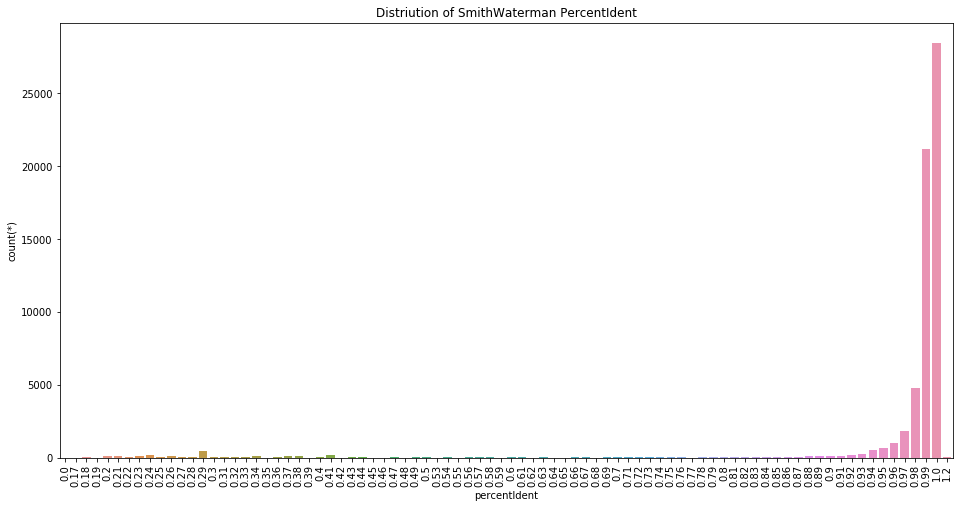

In [14]:
plt.figure(figsize=(16, 8));
a = sns.barplot(x = stats.loc[:,"percentIdent"],y = stats.loc[:,"count(*)"] )
a.set_xticklabels(a.get_xticklabels(), rotation=90);
plt.title('Distriution of SmithWaterman PercentIdent');

## 191204
- Download all results from HuVarBase (774,863 variants from 18,318 proteins) to a tsv file
- import tsv into scop as a HuVarBase Table

## Meeting with John-Marc
### 1. Stats Grab   
    1) whether the length of smithwaterman the same ---> whether there're gaps  
    2) deamination defined only as 2 different types D(uniprot) --> N(seqres) and Q --> E  
### 2. Presentation of Stats:  
    1) out of all pdb_chains, how many mapped to uniprot?  
    2) out of the pdb_chains mapped to uniprot, how many are exactly the same?  
    3) out of the ones not same, how many local alignments are identical?  
    4) if not, how many identical after considering deamidation?  
    5) if not, how many are have percentIdent (biojava similar) = 1.00?  
    6) if not, how many above 0.9?  
    7) if not, how many do not have gaps  
    8) how many nulls?  
### 3. Import HuVarBase and Roland group datasets   

## 191205

### 1. whether the length of smithwaterman the same ---> whether there're gaps

`
SELECT count(*) FROM compare_uniprot_seqres_stat WHERE aligned_uniprot IS NOT NULL;
+----------+
| count(*) |
+----------+
|    61670 |
+----------+
`

`
SELECT count(*) FROM compare_uniprot_seqres_stat WHERE aligned_uniprot IS  NULL;
+----------+
| count(*) |
+----------+
|       45 |
+----------+
`

`
ALTER TABLE compare_uniprot_seqres_stat ADD gap_length INT NULL;
`

`
UPDATE compare_uniprot_seqres_stat SET gap_length = (length(aligned_uniprot)-length(aligned_seqres));
`

`
select count(*) from compare_uniprot_seqres_stat where gap_length = 0;
+----------+
| count(*) |
+----------+
|    61670 |
+----------+
`

`
MySQL [scop]> select count(*) from compare_uniprot_seqres_stat where gap_length IS NULL;
+----------+
| count(*) |
+----------+
|       45 |
+----------+
`

**From the above results, we see there's no gap in the smith waterman alignments that both sequence are present**

## 191206

1. Get the Amidation Stats using inspectAmidation.java

`
ALTER TABLE compare_uniprot_seqres_stat ADD (D_to_N INT NULL, Q_to_E INT NULL);
`

`
ALTER TABLE compare_uniprot_seqres_stat ADD (N_to_D INT NULL, E_to_Q INT NULL);
`

`
ALTER TABLE compare_uniprot_seqres_stat ADD (uniprot_gap INT NULL, seqres_gap INT NULL);
`

### Change percentIdent to the absolute percentage of identical residues, taking account gap is both uniprot and seqres
`
UPDATE compare_uniprot_seqres_stat SET percentIdent = (numIdent/length(aligned_uniprot));
`

### Calculate the total amidation

`
ALTER TABLE compare_uniprot_seqres_stat ADD (numAmidation INT NULL);
`


`
UPDATE compare_uniprot_seqres_stat SET numAmidation = (Q_to_E + E_to_Q + N_to_D + D_to_N);
`

`
select count(*) from compare_uniprot_seqres_stat where numAmidation > 0;
+----------+
| count(*) |
+----------+
|     6816 |
+----------+
`


`
ALTER TABLE compare_uniprot_seqres_stat ADD (percentIdentAmid double(6,2) NULL);
`

`
UPDATE compare_uniprot_seqres_stat SET percentIdentAmid = ((numIdent+numAmidation)/length(aligned_uniprot));
`

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [83]:
percentIdent = pd.read_csv('./percentIdent_191207.csv',sep = '\t')
percentIdentAmid = pd.read_csv('./percentIdentAmid_191207.csv',sep = '\t')

In [84]:
#for now replace null to 1.2
percentIdent.loc[0,"percentIdent"] = 1.2
percentIdentAmid.loc[0,"percentIdentAmid"] = 1.2

In [85]:
percentIdent["type"] = "identical"
percentIdentAmid["type"] = "with_amidation"

In [86]:
percentIdent = percentIdent.rename(columns = {"percentIdent":"percent"})
percentIdentAmid = percentIdentAmid.rename(columns = {"percentIdentAmid":"percent"})

In [87]:
percentIdent_cum = percentIdent
percentIdentAmid_cum = percentIdentAmid
percentIdent_cum["count(*)"] = percentIdent.loc[percentIdent["type"] == "identical",:].sort_values(by = "percent")["count(*)"].cumsum()

percentIdentAmid_cum["count(*)"] = percentIdentAmid.loc[percentIdentAmid["type"] == "with_amidation",:].sort_values(by = "percent")["count(*)"].cumsum()



In [88]:
combined_percent = percentIdent.append(percentIdentAmid)

combined_percent_cum = percentIdent_cum.append(percentIdentAmid_cum)

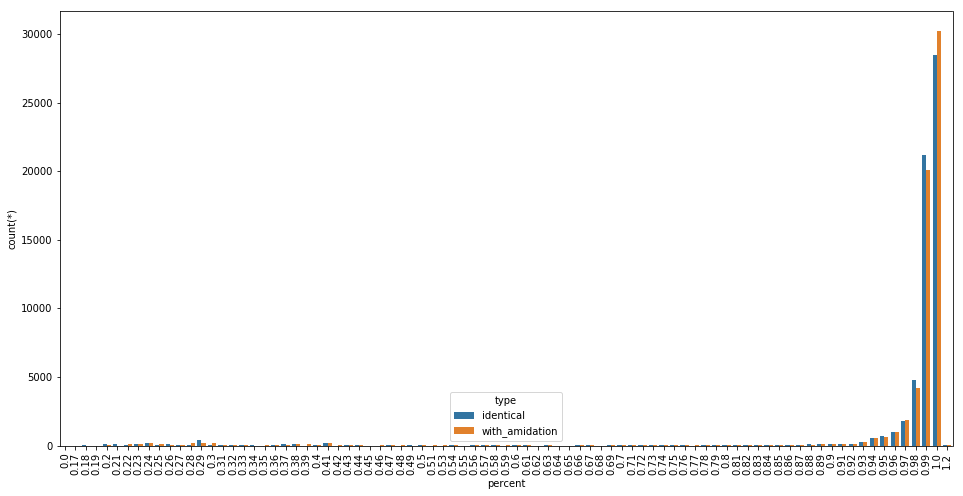

In [30]:
plt.figure(figsize=(16, 8));
g = sns.barplot(x="percent", y="count(*)", hue="type", data=combined_percent)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [31]:
combined_percent_large = combined_percent.loc[combined_percent["percent"]>=0.90,:]
combined_percent_small = combined_percent.loc[combined_percent["percent"]<0.90,:]

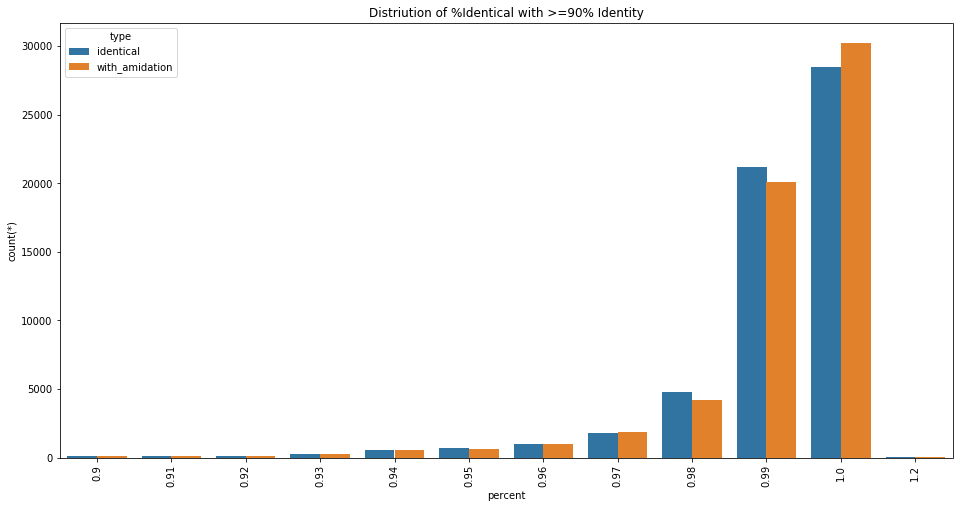

In [32]:
plt.figure(figsize=(16, 8));
g = sns.barplot(x="percent", y="count(*)", hue="type", data=combined_percent_large)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Distriution of %Identical with >=90% Identity');

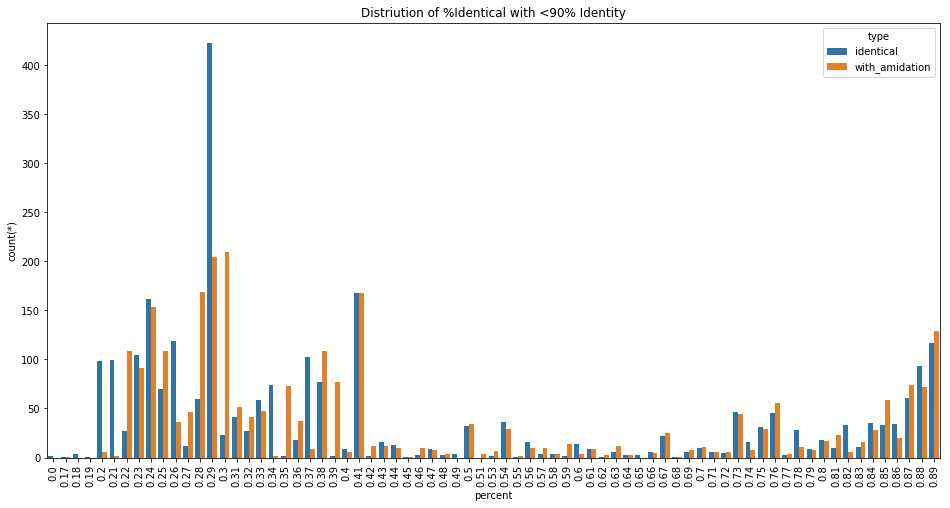

In [33]:
plt.figure(figsize=(16, 8));
g = sns.barplot(x="percent", y="count(*)", hue="type", data=combined_percent_small)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Distriution of %Identical with <90% Identity');

In [44]:
combined_percent

,percent,count(*),type
0,1.20,318565,identical
1,0.00,2,identical
2,0.17,5,identical
3,0.18,12,identical
4,0.19,20,identical
5,0.20,126,identical
6,0.21,331,identical
7,0.22,563,identical
8,0.23,899,identical
9,0.24,1397,identical


In [89]:
combined_percent_cum

,percent,count(*),type
0,1.20,61715,identical
1,0.00,2,identical
2,0.17,3,identical
3,0.18,7,identical
4,0.19,8,identical
5,0.20,106,identical
6,0.21,205,identical
7,0.22,232,identical
8,0.23,336,identical
9,0.24,498,identical


In [90]:
combined_percent_large_cum = combined_percent_cum.loc[combined_percent_cum["percent"]>=0.90,:]
combined_percent_small_cum = combined_percent_cum.loc[combined_percent_cum["percent"]<0.90,:]

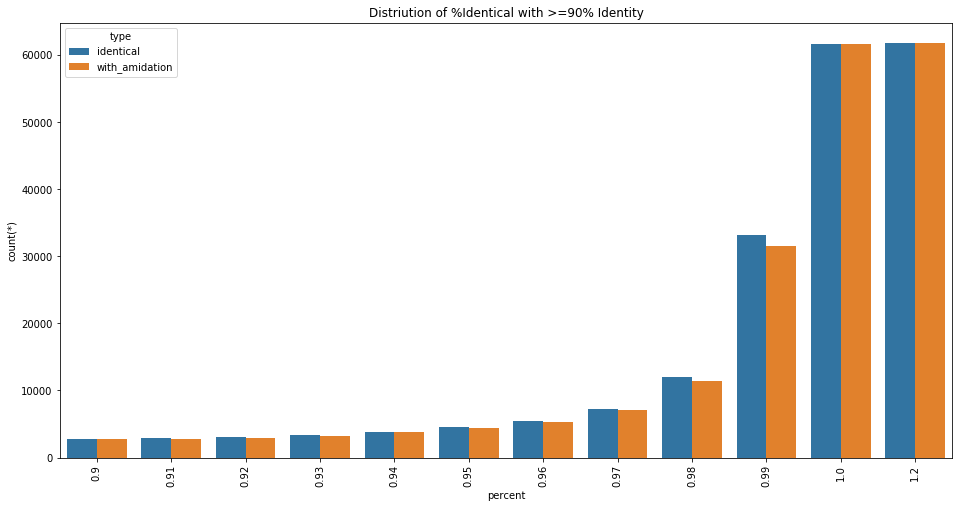

In [91]:
plt.figure(figsize=(16, 8));
g = sns.barplot(x="percent", y="count(*)", hue="type", data=combined_percent_large_cum)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Distriution of %Identical with >=90% Identity');

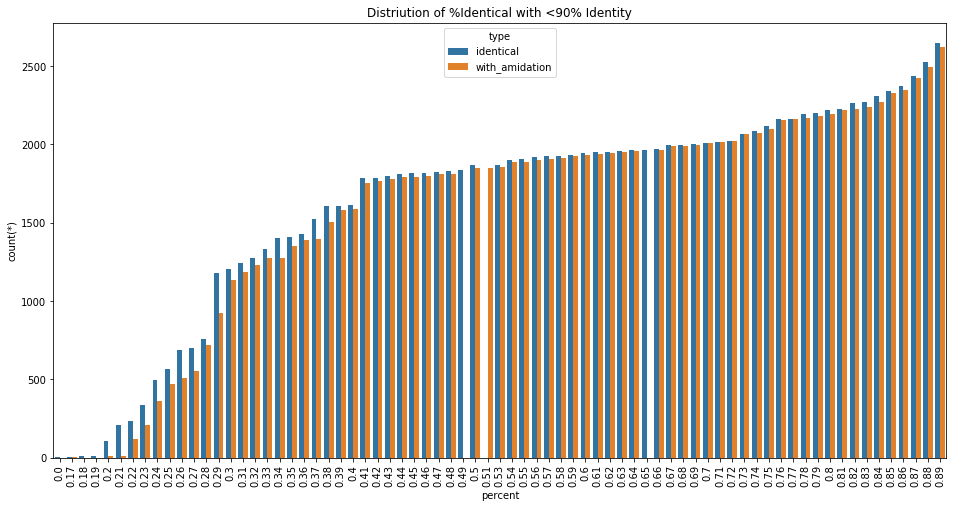

In [92]:
plt.figure(figsize=(16, 8));
g = sns.barplot(x="percent", y="count(*)", hue="type", data=combined_percent_small_cum)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Distriution of %Identical with <90% Identity');

In [10]:
stats = pd.read_csv('./compare_uniprot_seqres_stat_191207.csv',sep = '\t')
stats.head(10)

,pdb_chain_dbref_id,numIdent,numSimilar,percentIdent,aligned_uniprot,aligned_seqres,is_same,gap_length,D_to_N,Q_to_E,N_to_D,E_to_Q,uniprot_gap,seqres_gap,numAmidation,percentIdentAmid
0,5539951,252,253,1.00,MLAKRIIACLDVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,MLAKRIIACLNVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
1,5539952,252,253,1.00,MLAKRIIACLDVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,MLAKRIIACLNVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2,5539953,252,253,1.00,MLAKRIIACLDVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,MLAKRIIACLNVKDGRVVKGTNFENLRDSGDPVELGKFYSEIGIDE...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
3,5539957,28,29,0.97,RVCPRILMECKKDSDCLAECVCLEHGYCG,RVCPRILLECKKDSDCLAECVCLEHGYCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97
4,5539973,140,140,1.00,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
5,5539974,140,140,1.00,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
6,5539975,143,144,0.99,HLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGD...,HLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPYTQRFFESFGD...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99
7,5539976,143,144,0.99,HLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGD...,HLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPYTQRFFESFGD...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99
8,5539977,140,140,1.00,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
9,5539981,140,140,1.00,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [11]:
stats_f = stats.loc[~np.isnan(stats["percentIdentAmid"]),:]

In [12]:
len(stats_f)

61670

In [13]:
len(stats) - len(stats_f)

45

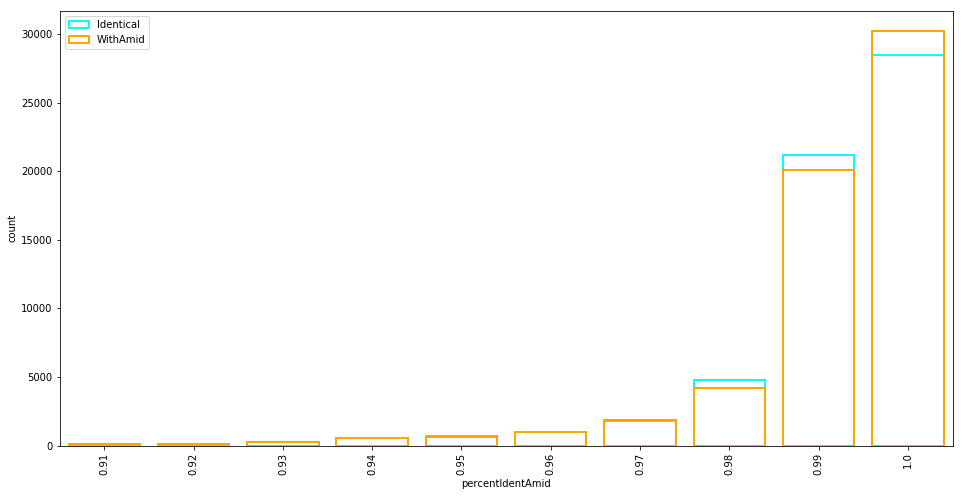

In [14]:
plt.figure(figsize=(16, 8));
a = sns.countplot(stats_f.loc[stats_f["percentIdent"]>0.90,"percentIdent"],label = "Identical",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="cyan")
sns.countplot(stats_f.loc[stats_f["percentIdentAmid"]>0.90,"percentIdentAmid"],label = "WithAmid",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="orange")
a.set_xticklabels(a.get_xticklabels(), rotation=90);
plt.legend()

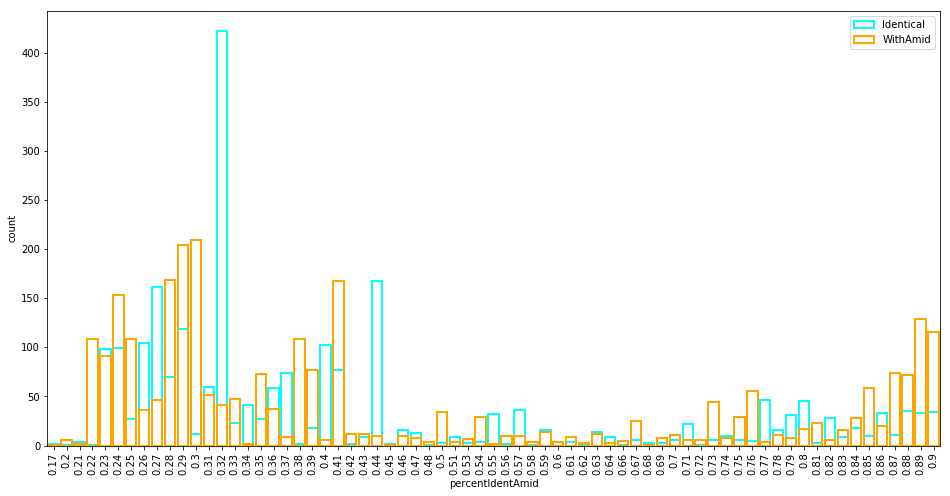

In [15]:
plt.figure(figsize=(16, 8));
a = sns.countplot(stats_f.loc[stats_f["percentIdent"]<=0.90,"percentIdent"],label = "Identical",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="cyan")
sns.countplot(stats_f.loc[stats_f["percentIdentAmid"]<=0.90,"percentIdentAmid"],label = "WithAmid",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="orange")
a.set_xticklabels(a.get_xticklabels(), rotation=90);
plt.legend()

### Inspect the distribution of gaps

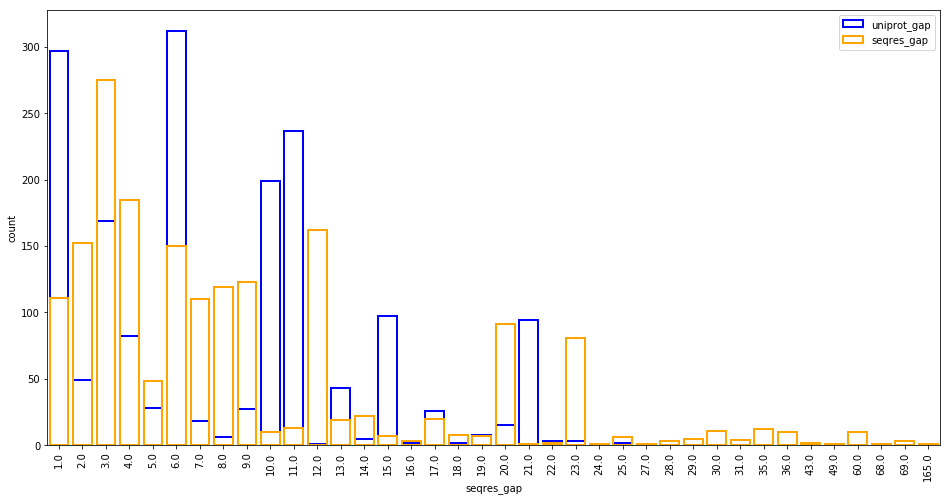

In [16]:
plt.figure(figsize=(16, 8));
a = sns.countplot(stats_f.loc[stats_f["uniprot_gap"]>0,"uniprot_gap"],label = "uniprot_gap",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="blue")
sns.countplot(stats_f.loc[stats_f["seqres_gap"]>0,"seqres_gap"],label = "seqres_gap",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="orange")
a.set_xticklabels(a.get_xticklabels(), rotation=90);
plt.legend()

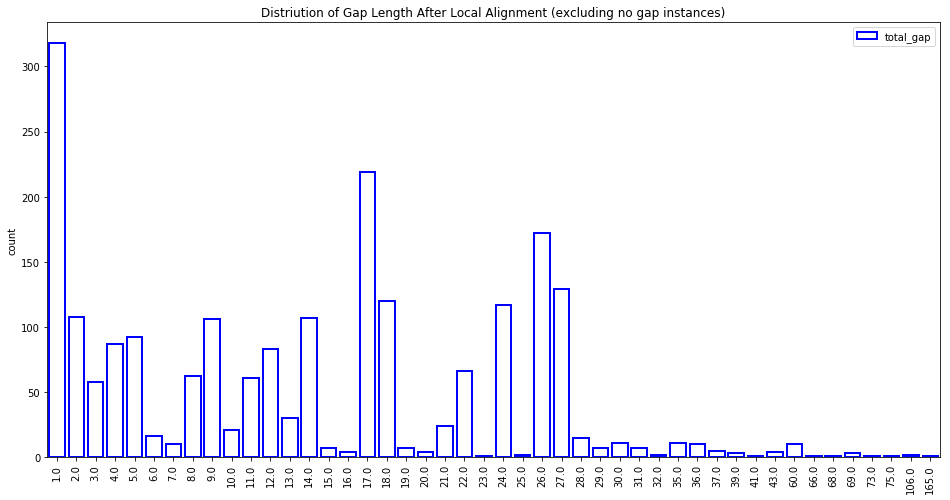

In [43]:
plt.figure(figsize=(16, 8));
a = sns.countplot(stats_f.loc[(stats_f["uniprot_gap"]+stats_f["seqres_gap"])>0,"uniprot_gap"] + stats_f.loc[(stats_f["uniprot_gap"]+stats_f["seqres_gap"])>0,"seqres_gap"],label = "total_gap",facecolor=(0, 0, 0, 0),linewidth=2,edgecolor="blue")
a.set_xticklabels(a.get_xticklabels(), rotation=90);
plt.legend()
plt.title('Distriution of Gap Length After Local Alignment (excluding no gap instances)');

In [20]:
stats_f["total_gap"] = stats_f["uniprot_gap"] + stats_f["seqres_gap"]

/Users/changhua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
len(stats_f.loc[stats_f['total_gap']>0,"total_gap"])

2127

In [18]:
stats_f.loc[:,"percentIdent"].value_counts().head(20)

1.00    28441
0.99    21175
0.98     4760
0.97     1806
0.96      977
0.95      680
0.94      545
0.29      422
0.93      277
0.41      168
0.24      162
0.92      144
0.26      119
0.89      117
0.91      111
0.90      108
0.23      104
0.37      102
0.21       99
0.20       98
Name: percentIdent, dtype: int64

In [19]:
(stats_f.loc[:,"percentIdent"].value_counts()/len(stats)).head(20)

1.00    0.460844
0.99    0.343109
0.98    0.077129
0.97    0.029264
0.96    0.015831
0.95    0.011018
0.94    0.008831
0.29    0.006838
0.93    0.004488
0.41    0.002722
0.24    0.002625
0.92    0.002333
0.26    0.001928
0.89    0.001896
0.91    0.001799
0.90    0.001750
0.23    0.001685
0.37    0.001653
0.21    0.001604
0.20    0.001588
Name: percentIdent, dtype: float64

In [35]:
## number of alignment that are identical considering Amidation
stats_f.loc[:,"percentIdentAmid"].value_counts().iloc[0:6].sum()

57928

In [136]:
(stats_f.loc[:,"percentIdentAmid"].value_counts()/len(stats)).head(20)

1.00    0.489152
0.99    0.325788
0.98    0.068557
0.97    0.029652
0.96    0.015572
0.95    0.009917
0.94    0.008750
0.93    0.003954
0.30    0.003387
0.29    0.003306
0.28    0.002738
0.41    0.002722
0.24    0.002479
0.89    0.002090
0.92    0.002042
0.90    0.001880
0.25    0.001766
0.38    0.001766
0.22    0.001766
0.91    0.001491
Name: percentIdentAmid, dtype: float64

## Import Variant Database to SCOPe

## 191208
## Import HumanDiseaseStr, HumanPolyStr, and PrimateMutStr into SCOPe, obtain stats:

### SwissVar
- The largest publicly available data set of disease-associated (or deleterious) mutations is the SwissVar database [48]. Data in SwissVar are derived from annotations in the UniprotKB database [49]. Care et al.argue that the SwissVar human polymorphism data set is closer to what one would expect from random mutations under no selection pressure, and therefore represent the best “neutral” data set. They show convincingly that the possible accuracy one may achieve depends on the choice of neutral data set.
- For the specific case of missense mutations, we show data that mutations derived from human/non-human-primate sequence comparisons may provide a better data set compared to the human polymorphism data. This is precisely because the primate sequence differences with human proteins are more consistent with what we would expect on biophysical grounds than the human variants.
- To compile a human mutation data set, we downloaded data on mutations from the SwissVar database (release 57.8 of 22–Sep-2009) [48]. After removing unclassified variants, variants in very long proteins to reduce computation time (sequences of more than 2000 amino acids), redundant variants, and variants that are not accessible by single-site nucleotide substitutions (just 150 mutation types are accessible by single-site nucleotide change), we compiled separate human disease mutation as the deleterious mutations and human polymorphism as the neutral mutations, these two data sets labeled HumanDisease and HumanPoly respectively
- Non-human primate sequences were obtained from UniprotKB [49]. We used PSI-BLAST [53], [54] to identify likely primate orthologues of human proteins in the SwissVar data sets using a sequence identity cutoff of 90% between the human and primate sequences. More than 75% of the human-primate pairs we identified in this procedure have sequence identity greater than 95%, and are very probably orthologues. Mutations without insertions or deletions within 10 amino acids on either side of the mutation of amino acid differences in the PSI-BLAST alignments were compiled into a data set of human/primate sequence differences, PrimateMut. Only those single-site nucleotide substitutions were included in PrimateMut, although we did not directly check DNA sequences to see if this is how the sequence changes occurred.
- where possible, we mapped the human mutation sites in the HumanDisease, HumanPoly, and PrimateMut data sets to known structures of human proteins in the PDB using SIFTS [55], which provides Uniprot sequence identifiers and sequence positions for residues in the PDB.
- This mapping produced three data sets, HumanDiseaseStr, HumanPolyStr, and PrimateMutStr
- The resulting independent testing data set contains 2316 primate polymorphisms, 1407 human polymorphisms and 1405 human disease mutations.
- To produce an independent test set, we compared the SwissVar release 2012_03 of March 21, 2012 with that of release 57.8 of Sep. 22, 2009 used in the previous calculations. We selected the human-disease mutations and human polymorphisms contained in the new release and searched all human proteins in Uniprot/SwissProt against primate sequences to get additional primate polymorphisms, and then compared these human disease mutations and primate polymorphisms with our training data set to get those human disease mutations and primate polymotphisms not contained in the training data set as our independent testing data set. The resulting independent testing data set contains 2316 primate polymorphisms, 1407 human polymorphisms and 1405 human disease mutations.

`
CREATE TABLE human_disease_str(
uniprot_human TEXT NOT NULL,
res_number INT,
wildtype VARCHAR(1),
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`

`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/HumanDiseaseStr.txt' INTO TABLE human_disease_str FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`

`
CREATE TABLE human_disease_str_new(
uniprot_human TEXT NOT NULL,
res_number INT,
wildtype VARCHAR(1),
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`

`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/HumanDiseaseStr_new.txt' INTO TABLE human_disease_str_new FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`

`
CREATE TABLE human_poly_str(
uniprot_human TEXT NOT NULL,
res_number INT,
wildtype VARCHAR(1),
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`

`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/humanPolyStr.txt' INTO TABLE human_poly_str FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`

`
CREATE TABLE human_poly_str_new(
uniprot_human TEXT NOT NULL,
res_number INT,
wildtype VARCHAR(1),
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`


`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/humanPolyStr_new.txt' INTO TABLE human_poly_str_new FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`


`
CREATE TABLE primate_mut_str(
uniprot_human TEXT NOT NULL,
res_number_human INT,
wildtype VARCHAR(1),
uniprot_primate TEXT NOT NULL,
res_number_primate INT,
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`


`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/PrimateMutStr.txt' INTO TABLE primate_mut_str FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`



`
CREATE TABLE primate_mut_str_new(
uniprot_human TEXT NOT NULL,
res_number_human INT,
wildtype VARCHAR(1),
uniprot_primate TEXT NOT NULL,
res_number_primate INT,
mutant VARCHAR(1),
pdb_id TEXT,
chain_id VARCHAR(1),
monomer_surface DOUBLE,
ba_surface DOUBLE,
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id)
);
`


`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/PrimateMutStr_new.txt' INTO TABLE primate_mut_str_new FIELDS TERMINATED BY ' ' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`


`
select * from human_poly_str limit 5;
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number | wildtype | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| 1433S_HUMAN   |        155 | M        | I      | 3p1s   | B        |               2 |          2 |  1 |
| 1A01_HUMAN    |         33 | F        | S      | 1w72   | A        |             1.1 |        0.2 |  2 |
| 1A01_HUMAN    |         41 | R        | S      | 3bo8   | A        |            67.4 |         63 |  3 |
| 1A01_HUMAN    |         80 | G        | R      | 3bo8   | A        |            43.8 |       43.8 |  4 |
| 1A01_HUMAN    |         91 | M        | V      | 1w72   | A        |             2.7 |        0.6 |  5 |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
`

`
select * from human_disease_str_new limit 5;
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number | wildtype | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| 3BP2_HUMAN    |        420 | G        | E      | 3twr   | E        |            89.3 |          0 |  1 |
| 3BP2_HUMAN    |        420 | G        | R      | 3twr   | E        |            89.3 |          0 |  2 |
| 3BP2_HUMAN    |        418 | P        | H      | 3twr   | E        |            79.5 |        2.5 |  3 |
| 3BP2_HUMAN    |        418 | P        | L      | 3twr   | E        |            79.5 |        2.5 |  4 |
| 3BP2_HUMAN    |        418 | P        | R      | 3twr   | E        |            79.5 |        2.5 |  5 |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
`

`
select * from human_poly_str limit 5;
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number | wildtype | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| 1433S_HUMAN   |        155 | M        | I      | 3p1s   | B        |               2 |          2 |  1 |
| 1A01_HUMAN    |         33 | F        | S      | 1w72   | A        |             1.1 |        0.2 |  2 |
| 1A01_HUMAN    |         41 | R        | S      | 3bo8   | A        |            67.4 |         63 |  3 |
| 1A01_HUMAN    |         80 | G        | R      | 3bo8   | A        |            43.8 |       43.8 |  4 |
| 1A01_HUMAN    |         91 | M        | V      | 1w72   | A        |             2.7 |        0.6 |  5 |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
`

`
select * from human_poly_str_new limit 5;
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number | wildtype | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| 1B08_HUMAN    |         87 | N        | K      | 1agf   | A        |            10.7 |        0.2 |  1 |
| 1B08_HUMAN    |         98 | D        | Y      | 1agb   | A        |             9.7 |        0.2 |  2 |
| 1B08_HUMAN    |         48 | S        | A      | 3ffc   | A        |             6.1 |        0.1 |  3 |
| 1B08_HUMAN    |         48 | S        | P      | 3ffc   | A        |             6.1 |        0.1 |  4 |
| 1B08_HUMAN    |         48 | S        | T      | 3ffc   | A        |             6.1 |        0.1 |  5 |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
`

`
select * from primate_mut_str limit 5;
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number_human | wildtype | uniprot_primate | res_number_primate | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
| 2A5G_HUMAN    |              276 | E        | Q5R4P5_PONAB    |                142 | G      | 2iae   | E        |            43.6 |       43.6 |  1 |
| 2A5G_HUMAN    |              204 | I        | Q5R6S7_PONAB    |                142 | T      | 2nyl   | B        |               0 |          0 |  2 |
| 2A5G_HUMAN    |              235 | F        | Q5R6S7_PONAB    |                162 | S      | 2jak   | A        |              10 |         10 |  3 |
| A1AT_HUMAN    |              116 | I        | A1AT_PONAB      |                142 | V      | 1ezx   | A        |               0 |          0 |  4 |
| A1AT_HUMAN    |              165 | E        | A1AT_PONAB      |                162 | D      | 1hp7   | A        |            41.1 |       27.2 |  5 |
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
`

`
select * from primate_mut_str_new limit 5;
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number_human | wildtype | uniprot_primate | res_number_primate | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
| 1433E_HUMAN   |              170 | R        | Q4R7F9_MACFA    |                142 | H      | 2br9   | A        |            17.8 |       17.8 |  1 |
| 1433F_HUMAN   |               69 | K        | Q4R5L9_MACFA    |                142 | E      | 2c63   | C        |            27.1 |       27.1 |  2 |
| 1433F_HUMAN   |              166 | Q        | Q4R5L9_MACFA    |                162 | R      | 2c74   | B        |            48.5 |       48.5 |  3 |
| 1433F_HUMAN   |              102 | S        | B5FW73_OTOGA    |                142 | A      | 2c74   | A        |            36.8 |       36.8 |  4 |
| 1A01_HUMAN    |               48 | A        | Q95HG7_PONPY    |                142 | T      | 3bo8   | A        |             0.8 |        0.8 |  5 |
+---------------+------------------+----------+-----------------+--------------------+--------+--------+----------+-----------------+------------+----+
`

`
select count(*) from human_disease_str_new limit 5;
+----------+
| count(*) |
+----------+
|     1405 |
+----------+
1 row in set (0.002 sec)
`
`
MySQL [scop]> select count(*) from human_disease_str limit 5;
+----------+
| count(*) |
+----------+
|     6938 |
+----------+
1 row in set (0.003 sec)
`

`
MySQL [scop]> select count(*) from human_poly_str limit 5;
+----------+
| count(*) |
+----------+
|     3325 |
+----------+
1 row in set (0.002 sec)
`

`
MySQL [scop]> select count(*) from human_poly_str_new limit 5;
+----------+
| count(*) |
+----------+
|     1367 |
+----------+
1 row in set (0.002 sec)
`

`
MySQL [scop]> select count(*) from primate_mut_str limit 5;
+----------+
| count(*) |
+----------+
|     3575 |
+----------+
1 row in set (0.002 sec)
`

`
MySQL [scop]> select count(*) from primate_mut_str_new limit 5;
+----------+
| count(*) |
+----------+
|     2316 |
+----------+
1 row in set (0.002 sec)
`

## Import  HuVarBase into SCOPe, obtain stats:

- The current human variant datasets available in 1000 Genomes [3], ClinVar [4], COSMIC [5], SwissVar [6] and Humsavar (https://www.uniprot.org/docs/humsavar) were downloaded and merged based on their UniProt [10] identifiers.
- If the UniProt identifiers were not available in the dataset, then the same were obtained from UniProt database using the Gene Name or sequence identifiers. 
- For the COSMIC [5] dataset, variants reported in two or more tumor samples were designated as cancer causing (driver mutations) [11] and included in our databases. Remaining COSMIC variant data were not included in our database. 
- If a variant is reported in more than one database, then the variant data is merged and the respective databases are mentioned in the source column. Protein sequences corresponding to the UniProt identifiers were obtained from the UniProt server. 
- For a given variant, the neighboring residue information(three residues each, before and after the mutated residue) was taken from either the UniProt canonical protein sequence, or the UniProt isoform protein sequence, whichever had the amino acid residue in which the variant was reported. 
- **Protein Data Bank—PDB [12] identifiers of proteins and the secondary structure information of the variant residue were obtained from the SIFTS [13] database. Chromosome number and & genome position corresponding to the variants were collected from the neXtProt [14] database.**
- Subcellular localization, function and post-translational modifications of the proteins were obtained from the UniProt database. 
- Protein domains in which the variant residues were present were obtained from the Pfam (https://pfam.xfam.org) database [15]. 
- The disease classes were obtained from the KEGG [16] database based on the disease description. If the disease description does not match with that of the KEGG database, then other sources like Genetic and Rare Diseases Information Center (https://rarediseases.info.nih.gov/) [17] and Genetic Testing Registry (https://www.ncbi.nlm.nih.gov/gtr/) [18] were referred to obtain the name of the disease or synonyms of the disease. Then using that particular information, disease class was obtained from KEGG database. 
- The present scope of the HuVarBase is to include small-scale variants of ‘missense’, ‘insertion’ and ‘deletion’ types along with the ‘non-sense’ type. Large-scale variations like large copy number variations will be added in future versions of HuVarBase.

`
CREATE TABLE huvarbase(
gene_name VARCHAR(100),
chromo_coordin VARCHAR(100),
DNA_mutation VARCHAR(100),
mutation_type VARCHAR(100),
orgin VARCHAR(100),
rs_id VARCHAR(100),
protein_change VARCHAR(100),
uniprot_id VARCHAR(100),
pdb_id VARCHAR(100),
isoform_canoncial_id VARCHAR(100),
neighboring_res VARCHAR(100),
sec_structure VARCHAR(100),
conserv_score DOUBLE,
function VARCHAR(100),
domain VARCHAR(100),
subcell_locali VARCHAR(100),
post_trans_modif VARCHAR(100),
disease VARCHAR(100),
disease_class VARCHAR(100),
ref_db VARCHAR(100),
id INT NOT NULL AUTO_INCREMENT,
PRIMARY KEY (id));
`

`
LOAD DATA INFILE '/mnt/net/ipa.jmcnet/data/h/ych323/huvarbase.tsv' INTO TABLE huvarbase FIELDS TERMINATED BY '\t' ENCLOSED BY '"'LINES TERMINATED BY '\n' IGNORE 1 ROWS;
`

`
select pdb_id from huvarbase where pdb_id != '-' limit 5;
+------------------------------------------------------------------------------------------------------+
| pdb_id                                                                                               |
+------------------------------------------------------------------------------------------------------+
| 4AIF_K241:A#K241:B,4APO_K241:A#K241:B                                                                |
| 4AIF_R271:A#R271:B,4APO_R271:A#R271:B                                                                |
| 1Q1Q_P134:A,1Q1Z_P149:A,1Q20_P149:A,1Q22_P149:A                                                      |
| 1Q1Q_R259:A,1Q1Z_R274:A,1Q20_R274:A,1Q22_R274:A                                                      |
| 3U84_F144:A#F144:B,3U85_F144:A,3U86_F144:A,3U88_F144:A#F144:B,4GPQ_F144:A,4GQ3_F144:A,4GQ4_F144:A,4G |
+------------------------------------------------------------------------------------------------------+
`

`
select count(*) from huvarbase where pdb_id != '-' limit 5;
+----------+
| count(*) |
+----------+
|   127080 |
+----------+
`

`
select count(*) from huvarbase where pdb_id != '-' and uniprot_id != '-';
+----------+
| count(*) |
+----------+
|   127080 |
+----------+
`

`
select count(*) from huvarbase where pdb_id != '-' and mutation_type = 'Missense';
+----------+
| count(*) |
+----------+
|   114909 |
+----------+
`


## One of the Next Step may be check if HuVarBase captures the ones in Roland databases (SwissVar)

## 191209
1. Store the current pdb_chain_dbref table as a pdb_chain_dbref_snap_191209.tsv 
2. java gov.lbl.scop.app.MakePDBSeqadv35Debug_JMC updated accession code

`
UPDATE pdb_chain_dbref_191022 t1 
        INNER JOIN pdb_chain_dbref t2 
             ON t1.pdb_chain_id = t2.pdb_chain_id
SET t1.db_accession = t2.db_accession 
`

`
CREATE TABLE pdb_chain_dbref_no_identifier_191209 AS SELECT * from pdb_chain_dbref_191022 where id not in (select id from dbref_uniprot_seq);
`

`
CREATE TABLE dbref_uniprot_seq_match_acc AS SELECT d.*, s.seq_id, s.uniprot_id,  SUBSTRING(a.seq,d.db_align_start,(d.db_align_end - d.db_align_start + 1)) AS frag, d.db_accession from pdb_chain_dbref_no_identifier_191209 AS d, uniprot AS u, uniprot_seq AS s, astral_seq AS a, uniprot_accession AS acc  WHERE (d.db_align_end - d.db_align_start) = (d.pdb_align_end - d.pdb_align_start) and d.db_accession = acc.accession and acc.uniprot_id = u.id and u.id = s.uniprot_id and s.seq_id = a.id and u.is_obsolete =0;
`

`
select count(*) from dbref_uniprot_seq_match_acc;
+----------+
| count(*) |
+----------+
|    10062 |
+----------+
`

`
select count(distinct(pdb_chain_id)) from dbref_uniprot_seq_match_acc;
+-------------------------------+
| count(distinct(pdb_chain_id)) |
+-------------------------------+
|                          9463 |
+-------------------------------+
`

## Inspect source of invalid identifier
`
select count(distinct(db_code)) from pdb_chain_dbref_no_identifier_191209;
+--------------------------+
| count(distinct(db_code)) |
+--------------------------+
|                     6006 |
+--------------------------+
`


`
CREATE TABLE dbref_uniprot_seq_match_acc_with_obs AS SELECT d.*, s.seq_id, s.uniprot_id, u.is_obsolete, SUBSTRING(a.seq,d.db_align_start,(d.db_align_end - d.db_align_start + 1)) AS frag from pdb_chain_dbref_no_identifier_191209 AS d, uniprot AS u, uniprot_seq AS s, astral_seq AS a, uniprot_accession AS acc  WHERE (d.db_align_end - d.db_align_start) = (d.pdb_align_end - d.pdb_align_start) and d.db_accession = acc.accession and acc.uniprot_id = u.id and u.id = s.uniprot_id and s.seq_id = a.id;
`

`
MySQL [scop]> select count(distinct(db_code)) from dbref_uniprot_seq_match_acc_with_obs where is_obsolete = 0;
+--------------------------+
| count(distinct(db_code)) |
+--------------------------+
|                     1374 |
+--------------------------+
1 row in set (0.046 sec)
`

`
MySQL [scop]> select count(distinct(db_code)) from dbref_uniprot_seq_match_acc_with_obs where is_obsolete = 1;
+--------------------------+
| count(distinct(db_code)) |
+--------------------------+
|                      517 |
+--------------------------+
`



`CREATE TABLE inspect_matched_invalid_identifier_191209 AS SELECT
d.*, m.valid_code, u.is_obsolete
FROM pdb_chain_dbref_no_identifier_191209 as d, missing_acc as acc, missing_match as m, uniprot as u
WHERE d.db_code = acc.db_code AND acc.db_accesion = m.db_accesion and m.valid_code = u.long_id
`

`
CREATE TABLE inspect_matched_invalid_identifier_191209 AS SELECT d.*,m.valid_code
FROM pdb_chain_dbref_no_identifier_191209 as d
INNER JOIN missing_match as m ON d.db_accession = m.db_accesion;
`


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
missing_match = pd.read_csv('./missing_match_191209.tsv',sep = '\t')
invalid_dbref = pd.read_csv('./pdb_chain_dbref_no_identifier_191209.tsv',sep = '\t')

In [3]:
missing_match.head()

,db_accesion,valid_code
0,P93343,1433C_TOBAC
1,P29312,1433Z_BOVIN
2,P18485,1A12_SOLLC
3,Q7M523,1A1D_CYBSA
4,Q00740,1A1D_PSEUD


In [4]:
invalid_dbref.head()

,id,pdb_chain_id,db_name,db_code,db_accession,db_align_start,db_align_end,pdb_align_start,pdb_align_end
0,5541304,253537,UNP,O06186_MYCTU,O06186,1,127,6,132
1,5541305,253538,UNP,O06186_MYCTU,O06186,1,127,6,132
2,5551269,284059,UNP,GLB_PARCA,P15160,1,116,0,115
3,5584423,371613,UNP,GLB_PARCA,P15160,1,116,0,115
4,5551287,284110,UNP,GLB1_CHLEU,Q08753,1,164,0,163


In [5]:
match_invalid = pd.merge(missing_match,invalid_dbref,left_on = "db_accesion", right_on = "db_accession")

In [6]:
match_invalid.head()

,db_accesion,valid_code,id,pdb_chain_id,db_name,db_code,db_accession,db_align_start,db_align_end,pdb_align_start,pdb_align_end
0,P93343,1433C_TOBAC,5594585,406968,UNP,143C_TOBAC,P93343,1,260,0,259
1,P93343,1433C_TOBAC,5572741,340128,UNP,143C_TOBAC,P93343,1,260,0,259
2,P93343,1433C_TOBAC,5572722,340105,UNP,143C_TOBAC,P93343,1,260,0,259
3,P93343,1433C_TOBAC,5594583,406966,UNP,143C_TOBAC,P93343,1,260,0,259
4,P29312,1433Z_BOVIN,5577457,354575,UNP,143Z_HUMAN,P29312,1,245,0,244


In [12]:
len(match_invalid["id"].unique())

23030

In [18]:
len(match_invalid["pdb_chain_id"].unique())

22736

In [13]:
len(invalid_dbref["id"].unique())

30451

In [9]:
unmached_invalid = invalid_dbref.loc[~invalid_dbref["id"].isin(match_invalid["id"]),:]

In [14]:
len(unmached_invalid["id"].unique())

7421

In [15]:
len(unmached_invalid["db_code"].unique())

1865

In [16]:
len(unmached_invalid["pdb_chain_id"].unique())

7367

In [17]:
uniprot = pd.read_csv('./uniprot_190419.txt',sep = '\t')

In [22]:
uniprot.head()

,long_id
0,001R_FRG3G
1,002L_FRG3G
2,002R_IIV3
3,003L_IIV3
4,003R_FRG3G


In [19]:
match_invalid_uniprot = pd.merge(match_invalid,uniprot,left_on = "valid_code",right_on = "long_id")

In [21]:
match_invalid_uniprot.head()

,db_accesion,valid_code,id,pdb_chain_id,db_name,db_code,db_accession,db_align_start,db_align_end,pdb_align_start,pdb_align_end,long_id
0,P93343,1433C_TOBAC,5594585,406968,UNP,143C_TOBAC,P93343,1,260,0,259,1433C_TOBAC
1,P93343,1433C_TOBAC,5572741,340128,UNP,143C_TOBAC,P93343,1,260,0,259,1433C_TOBAC
2,P93343,1433C_TOBAC,5572722,340105,UNP,143C_TOBAC,P93343,1,260,0,259,1433C_TOBAC
3,P93343,1433C_TOBAC,5594583,406966,UNP,143C_TOBAC,P93343,1,260,0,259,1433C_TOBAC
4,P29312,1433Z_BOVIN,5577457,354575,UNP,143Z_HUMAN,P29312,1,245,0,244,1433Z_BOVIN


In [20]:
match_invalid_uniprot_not_obs = match_invalid_uniprot.loc[match_invalid_uniprot["is_obsolete"] == 0,:]
match_invalid_uniprot_obs = match_invalid_uniprot.loc[match_invalid_uniprot["is_obsolete"] == 1,:]

KeyError: 'is_obsolete'

## 20200203
1. Write module to map HumanPoly, PrimateMut, and DiseaseMut to pdb chains


## Toy example on HumanDiseaseStr Table

**select * from human_disease_str limit 5;**

`
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| uniprot_human | res_number | wildtype | mutant | pdb_id | chain_id | monomer_surface | ba_surface | id |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
| ACTS_HUMAN    |        288 | D        | G      | 1t44   | A        |              68 |         68 |  1 |
| ACTS_HUMAN    |        294 | D        | V      | 1t44   | A        |              51 |         51 |  2 |
| ACTS_HUMAN    |        261 | E        | V      | 1t44   | A        |               0 |          0 |  3 |
| ACTS_HUMAN    |         17 | G        | R      | 1t44   | A        |            11.4 |       11.4 |  4 |
| ACTS_HUMAN    |        184 | G        | D      | 1t44   | A        |             4.4 |        4.4 |  5 |
+---------------+------------+----------+--------+--------+----------+-----------------+------------+----+
5 rows in set (0.002 sec)
`

**select id,pdb_chain_id,db_code from pdb_chain_dbref_191022  where db_code = 'ACTS_HUMAN';**

`
+---------+--------------+------------+
| id      | pdb_chain_id | db_code    |
+---------+--------------+------------+
| 5558809 |       307702 | ACTS_HUMAN |
| 5765309 |      1126823 | ACTS_HUMAN |
| 5721478 |      1027804 | ACTS_HUMAN |
+---------+--------------+------------+
3 rows in set (0.104 sec)
`

**select  d.id,d.pdb_chain_id, v.uniprot_human, v.res_number, SUBSTR(a.seq, v.res_number, 10),v.wildtype,v.mutant,v.pdb_id from human_disease_str as v, dbref_uniprot_seq_200203 as d, astral_seq as a where v.uniprot_human = d.db_code and d.seq_id = a.id limit 10;**

`
+---------+--------------+---------------+------------+------------+----------+--------+--------+
| id      | pdb_chain_id | uniprot_human | res_number | substr     | wildtype | mutant | pdb_id |
+---------+--------------+---------------+------------+------------+----------+--------+--------+
| 5573071 |       340871 | EMD_HUMAN     |         54 | saassysfsd | S        | F      | 1jei   |
| 5573106 |       340949 | EMD_HUMAN     |         54 | saassysfsd | S        | F      | 1jei   |
| 5564562 |       321761 | EMD_HUMAN     |         54 | saassysfsd | S        | F      | 1jei   |
| 5563554 |       319867 | CYC_HUMAN     |         42 | gqapgysyta | G        | S      | 3nwv   |
| 5550326 |       280793 | FOXC2_HUMAN   |        125 | slnecfvkvp | S        | L      | 1d5v   |
| 5541682 |       257028 | FOXP2_HUMAN   |        553 | rhnlslhkcf | R        | H      | 2as5   |
| 5563491 |       319742 | GGA1_HUMAN    |        239 | gaaagssedl | G        | S      | 1oxz   |
| 5572417 |       339235 | GGA1_HUMAN    |        239 | gaaagssedl | G        | S      | 1oxz   |
| 5571888 |       337859 | GGA1_HUMAN    |        239 | gaaagssedl | G        | S      | 1oxz   |
| 5574367 |       344332 | GGA1_HUMAN    |        239 | gaaagssedl | G        | S      | 1oxz   |
+---------+--------------+---------------+------------+------------+----------+--------+--------+
`

**from the query above it seems the res_number completely matches the data and could perform a match**

- HuVarBase is matched using Uniprot Accession Code
- for now wondering if should directly cross join everything or design a relational table to store the variant data

## 200204
- Discuss with John-Marc the following:
    1. How to embed the LiteMol js based example onto SCOPe webpage
    2. What data structure should be used to store a variant 
    3. What checks should be performed upon integration of variant and pdb_chain_dbref information
        
- Some current TODOs in mind:
    1. check if the residue index in the database match the uniprot sequence index in astral-seq
    2. check if all the uniprot identifiers in the variant database map to a uniprot entry / a dbref entry


## inner join human_disease_str and dbref_uniprot_seq

**select d.id,d.pdb_chain_id, v.uniprot_human, v.res_number, SUBSTR(a.seq, v.res_number, 1) as astral,v.wildtype,v.mutant,v.pdb_id, strcmp(lower(v.wildtype),SUBSTR(a.seq, v.res_number, 1)) as is_same from human_disease_str as v, dbref_uniprot_seq_200203 as d, astral_seq as a where v.uniprot_human = d.db_code and d.seq_id = a.id limit 10;**

`
+---------+--------------+---------------+------------+--------+----------+--------+--------+---------+
| id      | pdb_chain_id | uniprot_human | res_number | astral | wildtype | mutant | pdb_id | is_same |
+---------+--------------+---------------+------------+--------+----------+--------+--------+---------+
| 5573071 |       340871 | EMD_HUMAN     |         54 | s      | S        | F      | 1jei   |       0 |
| 5573106 |       340949 | EMD_HUMAN     |         54 | s      | S        | F      | 1jei   |       0 |
| 5564562 |       321761 | EMD_HUMAN     |         54 | s      | S        | F      | 1jei   |       0 |
| 5563554 |       319867 | CYC_HUMAN     |         42 | g      | G        | S      | 3nwv   |       0 |
| 5550326 |       280793 | FOXC2_HUMAN   |        125 | s      | S        | L      | 1d5v   |       0 |
| 5541682 |       257028 | FOXP2_HUMAN   |        553 | r      | R        | H      | 2as5   |       0 |
| 5563491 |       319742 | GGA1_HUMAN    |        239 | g      | G        | S      | 1oxz   |       0 |
| 5572417 |       339235 | GGA1_HUMAN    |        239 | g      | G        | S      | 1oxz   |       0 |
| 5571888 |       337859 | GGA1_HUMAN    |        239 | g      | G        | S      | 1oxz   |       0 |
| 5574367 |       344332 | GGA1_HUMAN    |        239 | g      | G        | S      | 1oxz   |       0 |
+---------+--------------+---------------+------------+--------+----------+--------+--------+---------+
10 rows in set (1.189 sec)
`

## outer join human_disease_str and dbref_uniprot_seq to check mismatches on both sides
create table link_human_disease_str_dbref_uniprot_seq_200204 as SELECT * FROM human_disease_str as v
LEFT JOIN dbref_uniprot_seq_200203 as d ON v.uniprot_human = d.db_code
UNION
SELECT * FROM human_disease_str as v
RIGHT JOIN dbref_uniprot_seq_200203 as d ON v.uniprot_human = d.db_code

- reference and variant 
- variant table - store information 
- if anything varies from version (pdb/uniprot/variant)
- 